In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

from IPython.display import clear_output

In [2]:
num_dims = 2

dim_size = 50


numWalks = 1

steps =  500


In [8]:
class Space:
    def __init__(self, numDims, dimSize):
      self.numDims = numDims
      self.dimSize = dimSize
      size_dims = [dim_size for i in range(num_dims)]
      self.space = Image.new("RGB", (dimSize, dimSize), (255, 255, 255))
      self.spacePixels = self.space.load()

    def validate(self,pixel):  
      pixel = list(pixel)
      for i in range(len(pixel)):
        if pixel[i] > 255:
          pixel[i] = 255
      pixel = tuple(pixel)
      return pixel  

    def genRandomColor(self):
      r = np.random.randint(0, 255)
      g = np.random.randint(0, 255)
      b = np.random.randint(0, 255)
      pixel = (r, g, b)
      return pixel

    def update(self, walker):
      walker.position = [i % dim_size for i in walker.position]
      #positions.append(position)
      walker.position = tuple(walker.position)
      if walker.color == "Random":
        color = self.genRandomColor()
      else:
        color = tuple(map(lambda i, j: i + j, self.spacePixels[walker.position[0],walker.position[1]], walker.color))
        color = self.validate(color) 
      self.spacePixels[walker.position[0],walker.position[1]] = color
      walker.position = list(walker.position)

    def showSpace(self):
      self.space.show()
        
    
  

In [7]:
class Walker:
  def __init__(self, row, col, color):
    self.row = row
    self.col = col
    self.position = [col,row]
    self.color = color    #tuple of three RGB values
    print("Starting location is: {}".format(self.position))



  def shuffle(self,elements):
    p = [1/num_axis for i in range(num_axis)]
    picks = np.random.choice(elements, num_axis, p=p, replace = False)
    return picks


  def NewgenSets(self):
    probs = []
    prob_groups = [[.30001,.4],[.40001,.5],[.70001,.8],[.90001,.99999]]

    both = {}
    bound = 1

    while sum(probs) < 1:
      if len(probs) == 0:
        temp_index = numWalks % 4
        prob_groups[temp_index]
        bound = np.random.uniform(low = prob_groups[temp_index][0], high = prob_groups[temp_index][1])
        probs.append(bound)
      if len(probs)== num_axis - 1:
        probs.append(1-sum(probs))
        break

      bound = np.random.uniform(low = 0.0, high = 1-sum(probs))
      probs.append(bound)
    movements = self.shuffle(elements)
    zip_iterator = zip(movements,probs)
    both = dict(zip_iterator)
    return movements,probs,both

  
  def get_Movement(self, elements,probabilities):
    choice = np.random.choice(elements, 1, p=probabilities)[0]
    return choice

  def takeStep(self, stepNum, space, walks):
    elementsCurrent,probabilities, both= self.NewgenSets() #gen new probs every step
    if stepNum == 0:
      space.update(self)
    else:
      direction = self.get_Movement(elementsCurrent,probabilities)
      index = int(direction[-1])
      if index % 2 == 0: 
        self.position[index//2] -= 1
        space.update(self)

      else:   
        self.position[index//2] += 1
        space.update(self)


In [9]:
walks = []
positions = []
num_axis = 2*num_dims
elements = ["Axis{}".format(i) for i in range(num_axis)]

color1 = "Random"
color2 = "Random"

space = Space(num_dims,dim_size)
walker1 = Walker(dim_size//2,dim_size//4, color1)
walker2 = Walker(dim_size//2,int(dim_size//(4/3)), color2)
walker3 = Walker(int(dim_size//(4/3)),dim_size//4, color2)
walker4 = Walker(int(dim_size//(4/3)),int(dim_size//(4/3)), color2)



walkers = [walker1, walker2, walker3, walker4]

#space.showSpace()
for i in range(steps):
  clear_output(wait=True)
  if i % 10 == 0: 
    walks.append(np.copy(space.space))
  for walker in walkers:
    walker.takeStep(i, space, walks)

  print("Current Progress:",np.round((i/steps)*100,2), "%")

Current Progress: 99.8 %


In [10]:
images = [Image.fromarray(img) for img in walks]
images = [img.convert("RGB") for img in images]
images = [ImageOps.autocontrast(img) for img in images]

images[-1].show()

In [9]:
images[-1].save("Last_Walk.png")

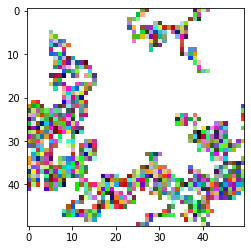

In [11]:
plt.imshow(walks[-1])


In [12]:


#plt.imshow(walks[100])

images = [Image.fromarray(img) for img in walks]
images = [img.convert("RGB") for img in images]
images = [ImageOps.autocontrast(img) for img in images]


images[0].save('Walks.GIF',
               save_all=True,
               append_images=images,
               duration=5,
               loop=0)